In [114]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [115]:
df = data.movies()

# Convert string dates to `datetime`
df["Release_Date"] = pd.to_datetime(df["Release_Date"], format="%b %d %Y")

# Fix invalid dates that are in wrong century
df.loc[df["Release_Date"] > "2012", "Release_Date"] -= pd.DateOffset(years=100)

# Having just the year separated from the full data will make charting and querying easier
df["Release_Year"] = df["Release_Date"].dt.year

In [138]:
# filtering df based on genre
genre_list = ['Comedy','Drama','Action']
df_genre = df[df.Major_Genre.isin(genre_list)]

# filtering df_genre based on rating
rating_list = ['G','PG','R']
df_rating = df_genre[df_genre.MPAA_Rating.isin(rating_list)]

# filtering df_rating based on the year range
start_year = 1980
end_year = 1999
df_year = df_rating.query('Release_Year >= @start_year and Release_Year <= @end_year')
top_us_gross_df = (df_year[df_year['US_Gross']
                          .notnull()]
                          .sort_values("US_Gross", ascending=False)
                          .head(10))
# top_us_gross_df

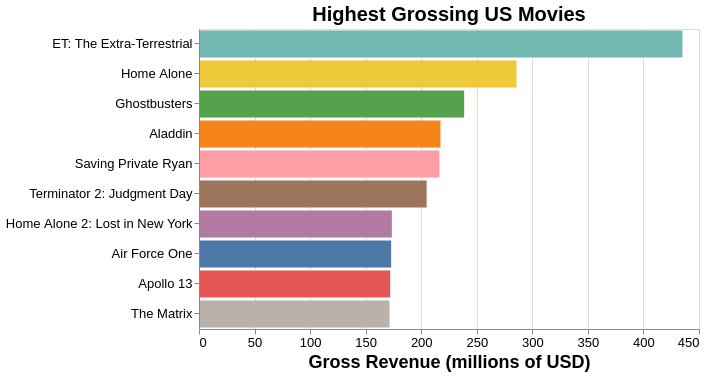

In [139]:

top_gross = alt.Chart(top_us_gross_df).transform_calculate(
    gross_revenue_per_million="datum.US_Gross/1000000"
).encode(
    y = alt.Y("Title", title=None,
          sort=alt.EncodingSortField(
              field="gross_revenue_per_million",
              order="descending"),
          axis=alt.Axis(labelLimit=300)),
    tooltip=[alt.Tooltip("Release_Year:N",
                         title="Release Year"),
             alt.Tooltip("Major_Genre:N",
                         title="Genre",
                         format="%Y"),
             alt.Tooltip("MPAA_Rating:N",
                         title="MPAA Rating",
                         format="%Y"),
             alt.Tooltip("gross_revenue_per_million:Q",
                         title="Gross Revenue (millions)",
                         format=".2f")],
).properties(
    title="Highest Grossing US Movies",
    width=500,
    height=300
).configure_axis(labelFontSize=13,titleFontSize=18
).configure_title(fontSize=20
)

top_us_gross_chart = top_gross.mark_bar(
).encode(
    alt.X("gross_revenue_per_million:Q", title="Gross Revenue (millions of USD)"),
    color = alt.Color("Title:N", legend=None
))

top_us_gross_chart.interactive()